<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

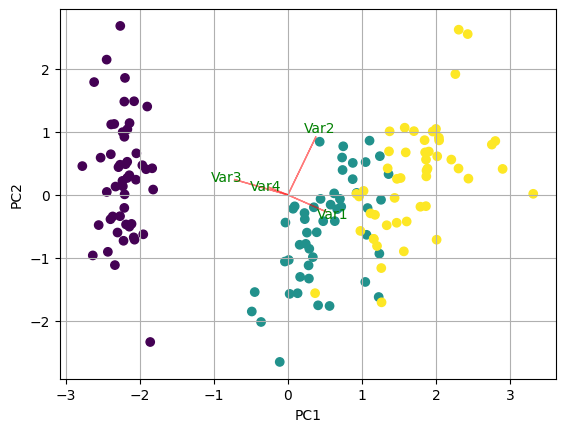

In [1]:
# 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target

#In general it is a good idea to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function.
myplot(x_new[:,0:2], pca.components_)
plt.show()

In [7]:
#1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
names = [ "SVM", "Naive Bayes", "LDA",
"QDA", "Decision Tree", "Random Forest",
"Nearest Neighbors", "Neural Networks"]
classifiers = [
SVC(),
GaussianNB(),
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
DecisionTreeClassifier(),
RandomForestClassifier(),
KNeighborsClassifier(),
MLPClassifier(alpha=1, max_iter=1000)]
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
s = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    s.append(score)
    print(name +": " + str(score))

classify = pd.DataFrame(data = s, columns=['score'])
classify.head(2)

SVM: 0.9466666666666667
Naive Bayes: 0.9466666666666667
LDA: 0.96
QDA: 0.96
Decision Tree: 0.96
Random Forest: 0.96
Nearest Neighbors: 0.96
Neural Networks: 0.9866666666666667


,score
0,0.946667
1,0.946667


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'score'}, axis=1)
              .sort_values('score', ascending=True))
  xs = counted['score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('score')
_ = plt.ylabel('count()')